# Rf 1 1 0_Normintegration
Basic functionality: examples on normalization and integration of p.d.fs, construction of cumulative distribution functions from monodimensional p.d.f.s




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:42 AM.</small></i>

In [1]:
from __future__ import print_function
import ROOT

Welcome to JupyROOT 6.18/03


Set up model
---------------------

Create observables x,y

In [2]:
x = ROOT.RooRealVar("x", "x", -10, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create p.d.f. gaussx(x,-2,3)

In [3]:
gx = ROOT.RooGaussian(
    "gx", "gx", x, ROOT.RooFit.RooConst(-2), ROOT.RooFit.RooConst(3))

Retrieve raw & normalized values of RooFit p.d.f.s
--------------------------------------------------------------------------------------------------

Return 'raw' unnormalized value of gx

In [4]:
print("gx = ", gx.getVal())

gx =  0.800737402917


Return value of gx normalized over x in range [-10,10]

In [5]:
nset = ROOT.RooArgSet(x)
print("gx_Norm[x] = ", gx.getVal(nset))

gx_Norm[x] =  0.106895504484


Create object representing integral over gx
which is used to calculate  gx_Norm[x] == gx / gx_Int[x]

In [6]:
igx = gx.createIntegral(ROOT.RooArgSet(x))
print("gx_Int[x] = ", igx.getVal())

gx_Int[x] =  7.4908426391


Integrate normalized pdf over subrange
----------------------------------------------------------------------------

Define a range named "signal" in x from -5,5

In [7]:
x.setRange("signal", -5, 5)

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'signal' created with bounds [-5,5]


Create an integral of gx_Norm[x] over x in range "signal"
ROOT.This is the fraction of of p.d.f. gx_Norm[x] which is in the
range named "signal"

In [8]:
xset = ROOT.RooArgSet(x)
igx_sig = gx.createIntegral(xset, ROOT.RooFit.NormSet(xset), ROOT.RooFit.Range("signal"))
print("gx_Int[x|signal]_Norm[x] = ", igx_sig.getVal())

gx_Int[x|signal]_Norm[x] =  0.834753277847


Construct cumulative distribution function from pdf
-----------------------------------------------------------------------------------------------------

Create the cumulative distribution function of gx
i.e. calculate Int[-10,x] gx(x') dx'

In [9]:
gx_cdf = gx.createCdf(ROOT.RooArgSet(x))

Plot cdf of gx versus x

In [10]:
frame = x.frame(ROOT.RooFit.Title("c.d.f of Gaussian p.d.f"))
gx_cdf.plotOn(frame)

<ROOT.RooPlot object ("frame_x_560f632eb270") at 0x560f632eb270>

Draw plot on canvas

In [11]:
c = ROOT.TCanvas("rf110_normintegration",
                 "rf110_normintegration", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.6)
frame.Draw()

c.SaveAs("rf110_normintegration.png")

Info in <TCanvas::Print>: png file rf110_normintegration.png has been created


Draw all canvases 

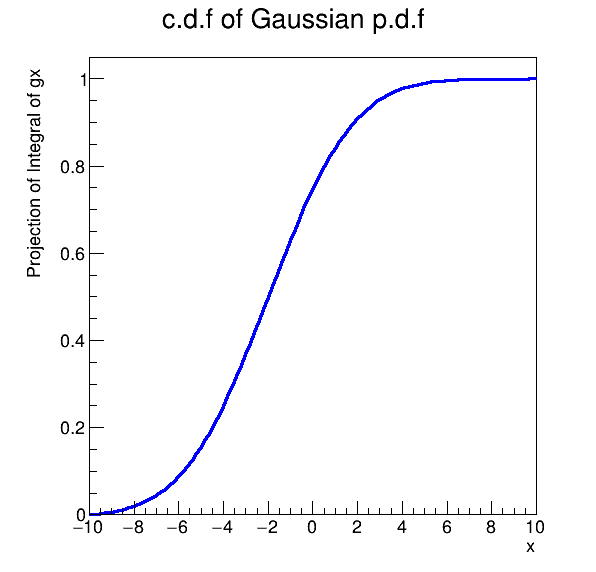

In [12]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()